<a href="https://colab.research.google.com/github/hizafioramahardika/PCVK_Genap_2021/blob/main/Week12_Hiza.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive

drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
from google.colab import drive

In [ ]:
jokowi_img = cv2.imread('/content/drive/MyDrive/Images/facedet/jokowi.jpg')
kartini_img = cv2.imread('/content/drive/MyDrive/Images/facedet/kartini.jpg')
kucing_img = cv2.imread('/content/drive/MyDrive/Images/facedet/kucing.jpg')
mask_img = cv2.imread('/content/drive/MyDrive/Images/facedet/mask.png')
jordan_img = cv2.imread('/content/drive/MyDrive/Images/facedet/mjordan.jpg')
solvayconf_img = cv2.imread('/content/drive/MyDrive/Images/facedet/solvayconf.jpg')

images = [jokowi_img,kartini_img,kucing_img,mask_img,jordan_img,solvayconf_img]

2. Lakukan Face Detection untuk image object lain yang tersedia pada (/images/facedet).
Tampilkan seperti pada contoh berikut.

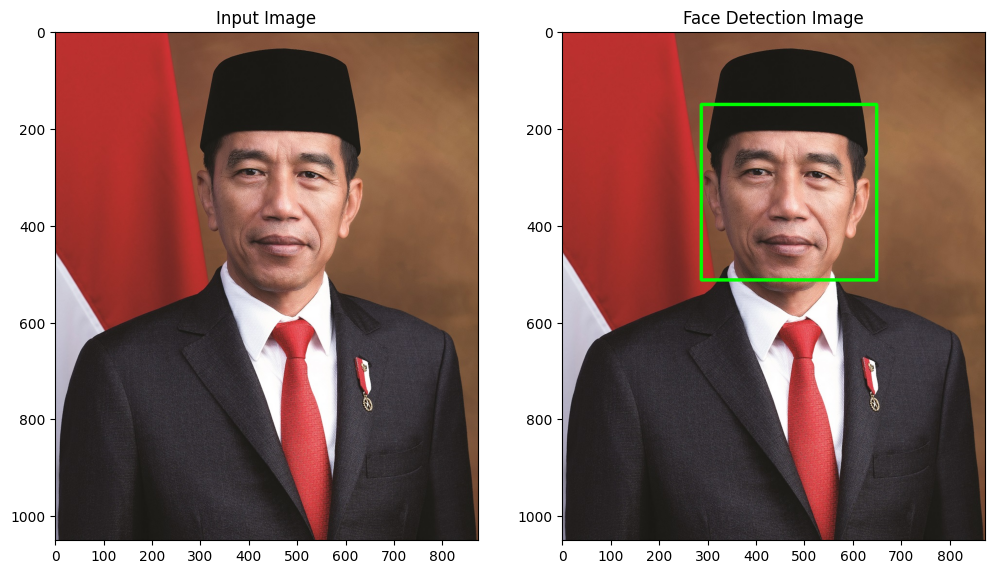

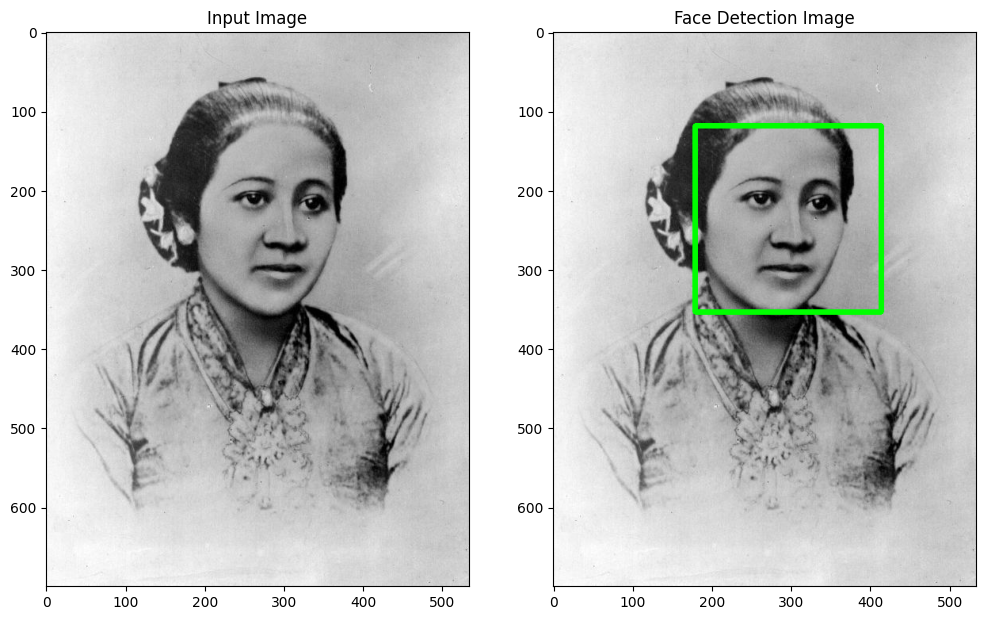

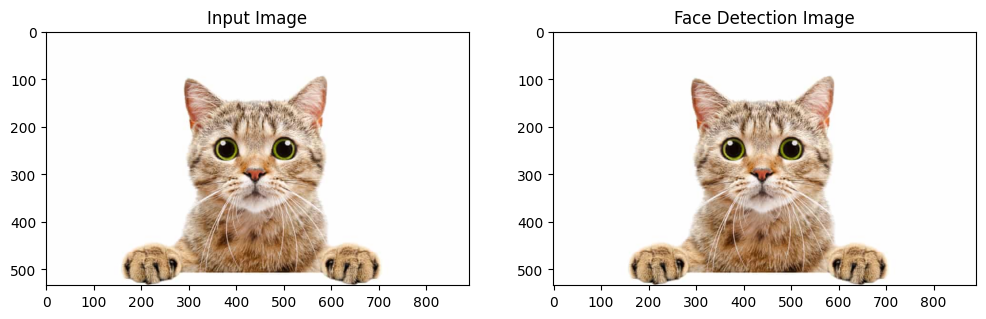

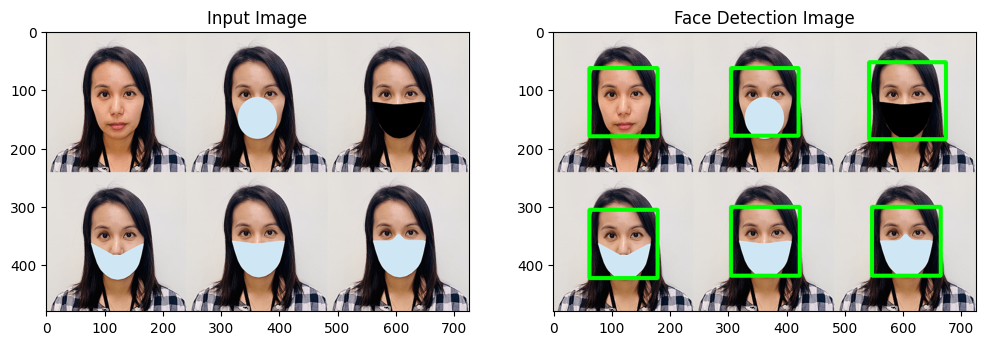

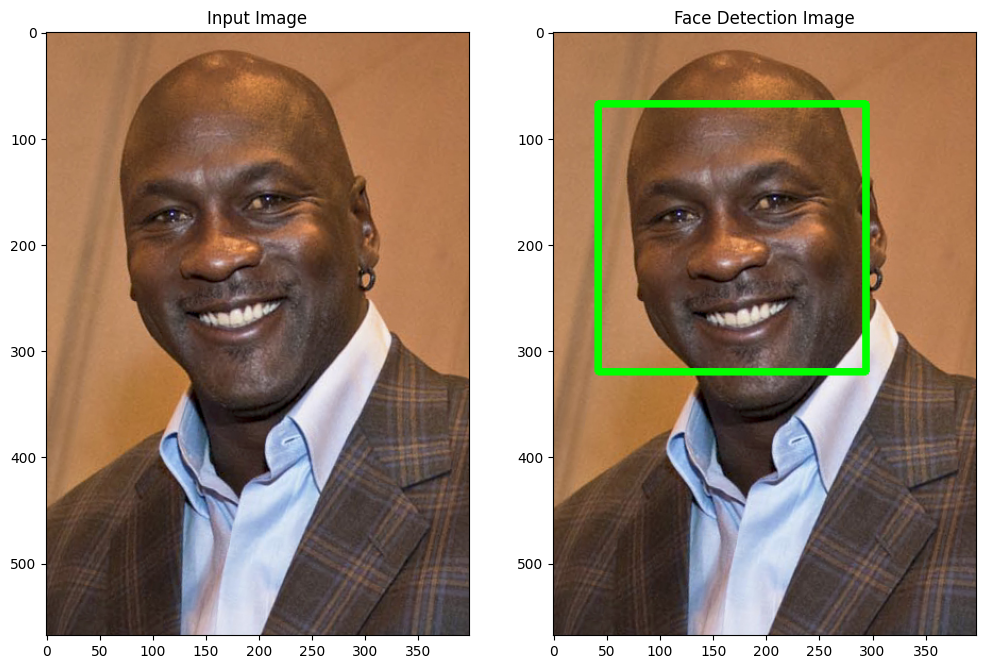

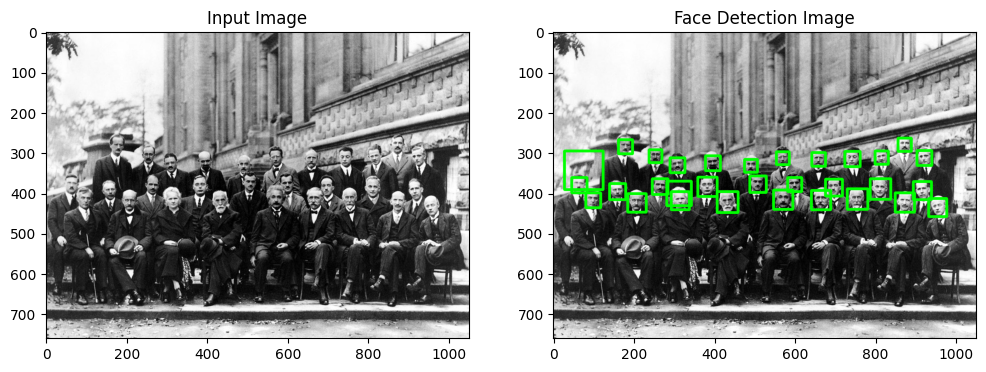

In [ ]:
haar_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')
mn=[5,5,2,2,5,3]
sc = [1.2,1.2,1.6,1.2,1.6,1.1]
for i,img in enumerate(images):
  facedet_img = img.copy()
  faces_rects = haar_cascade.detectMultiScale(img, scaleFactor = sc[i], minNeighbors = mn[i]);
  for (x,y,w,h) in faces_rects:
     cv2.rectangle(facedet_img, (x,y),(x+w,y+h),(0,255,0),5)
  plt.figure(figsize=(12, 8))
  plt.subplot(121), plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB), cmap='gray'), plt.title('Input Image')
  plt.subplot(122), plt.imshow(cv2.cvtColor(facedet_img,cv2.COLOR_BGR2RGB), cmap='gray'), plt.title('Face Detection Image')

3. Pada Soal No. 2 wajah kucing tidak bisa dideteksi dengan baik. Lakukan deteksi wajah kucing hingga muncul rectangle pada bagian wajahnya. Petunjuk pada soal ini,
perhatikan pretrained features yang telah disediakan OpenCV. Gunakan xml yang ada
jika memang telah disediakan. Jika belum ada, coba cari dengan searching melalui
search engines.

(<Axes: title={'center': 'Face Detection Image'}>,
 Text(0.5, 1.0, 'Face Detection Image'))

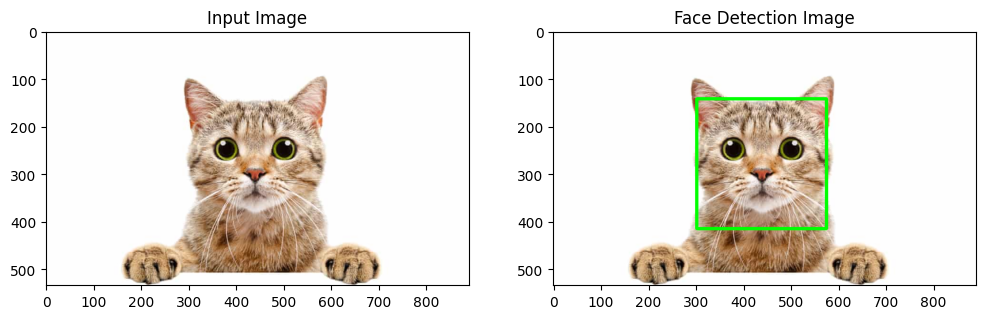

In [ ]:
cat_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalcatface.xml')

fascedet = kucing_img.copy()
faces_rects = cat_cascade.detectMultiScale(fascedet, scaleFactor = 1.5, minNeighbors = 2);
for (x,y,w,h) in faces_rects:
    cv2.rectangle(fascedet, (x,y),(x+w,y+h),(0,255,0),5)

plt.figure(figsize=(12, 8))
plt.subplot(121), plt.imshow(cv2.cvtColor(kucing_img,cv2.COLOR_BGR2RGB), cmap='gray'), plt.title('Input Image')
plt.subplot(122), plt.imshow(cv2.cvtColor(fascedet,cv2.COLOR_BGR2RGB), cmap='gray'), plt.title('Face Detection Image')

4. Cobakan juga untuk eyes detection.

(<Axes: title={'center': 'Face Detection Image'}>,
 Text(0.5, 1.0, 'Face Detection Image'))

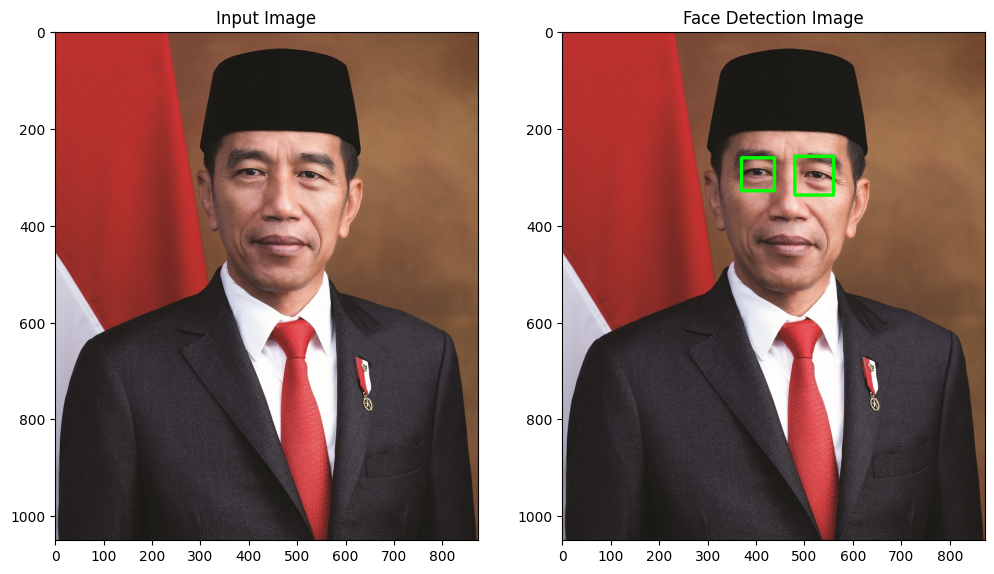

In [ ]:
eye_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_eye.xml')

fascedet = jokowi_img.copy()
faces_rects = eye_cascade.detectMultiScale(fascedet, scaleFactor = 1.2, minNeighbors = 5);
for (x,y,w,h) in faces_rects:
    cv2.rectangle(fascedet, (x,y),(x+w,y+h),(0,255,0),5)

plt.figure(figsize=(12, 8))
plt.subplot(121), plt.imshow(cv2.cvtColor(jokowi_img,cv2.COLOR_BGR2RGB), cmap='gray'), plt.title('Input Image')
plt.subplot(122), plt.imshow(cv2.cvtColor(fascedet,cv2.COLOR_BGR2RGB), cmap='gray'), plt.title('Face Detection Image')

5. Lakukan Face Tracking menggunakan Google Colab. Petunjuk, Tutorial selengkapnya
tentang akses kamera dan FaceDetection pada google colab dapat dilihat di link berikut: https://www.youtube.com/watch?v=YjWh7QvVH60

In [ ]:
from IPython.display import display, Javascript, Image
from google.colab.output import eval_js
from base64 import b64decode, b64encode
import cv2 as cv
import numpy as np
import PIL
import io
import html
import time

In [ ]:
def js_to_image(js_reply):
  """
  Params:
          js_reply: JavaScript object containing image from webcam
  Returns:
          img: OpenCV BGR image
  """
  # decode base64 image
  image_bytes = b64decode(js_reply.split(',')[1])
  # convert bytes to numpy array
  jpg_as_np = np.frombuffer(image_bytes, dtype=np.uint8)
  # decode numpy array into OpenCV BGR image
  img = cv2.imdecode(jpg_as_np, flags=1)

  return img

# function to convert OpenCV Rectangle bounding box image into base64 byte string to be overlayed on video stream
def bbox_to_bytes(bbox_array):
  """
  Params:
          bbox_array: Numpy array (pixels) containing rectangle to overlay on video stream.
  Returns:
        bytes: Base64 image byte string
  """
  # convert array into PIL image
  bbox_PIL = PIL.Image.fromarray(bbox_array, 'RGBA')
  iobuf = io.BytesIO()
  # format bbox into png for return
  bbox_PIL.save(iobuf, format='png')
  # format return string
  bbox_bytes = 'data:image/png;base64,{}'.format((str(b64encode(iobuf.getvalue()), 'utf-8')))

  return bbox_bytes

<IPython.core.display.Javascript object>

(480, 640)
Saved to photo.jpg


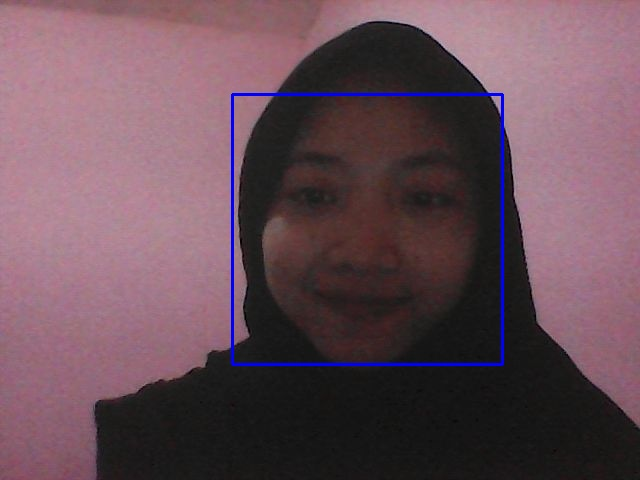

<IPython.core.display.Javascript object>

In [ ]:
face_cascade = cv.CascadeClassifier('/content/drive/MyDrive/Images/haarcascades/haarcascade_frontalface_alt.xml')
def take_photo(filename='photo.jpg', quality=0.8):
  js = Javascript('''
    async function takePhoto(quality) {
      const div = document.createElement('div');
      const capture = document.createElement('button');
      capture.textContent = 'Capture';
      div.appendChild(capture);

      const video = document.createElement('video');
      video.style.display = 'block';
      const stream = await navigator.mediaDevices.getUserMedia({video: true});

      document.body.appendChild(div);
      div.appendChild(video);
      video.srcObject = stream;
      await video.play();

      // Resize the output to fit the video element.
      google.colab.output.setIframeHeight(document.documentElement.scrollHeight, true);

      // Wait for Capture to be clicked.
      await new Promise((resolve) => capture.onclick = resolve);

      const canvas = document.createElement('canvas');
      canvas.width = video.videoWidth;
      canvas.height = video.videoHeight;
      canvas.getContext('2d').drawImage(video, 0, 0);
      stream.getVideoTracks()[0].stop();
      div.remove();
      return canvas.toDataURL('image/jpeg', quality);
    }
    ''')
  display(js)

    # get photo data
  data = eval_js('takePhoto({})'.format(quality))
  # get OpenCV format image
  img = js_to_image(data)
  # grayscale img
  gray = cv.cvtColor(img, cv.COLOR_RGB2GRAY)
  print(gray.shape)
  # get face bounding box coordinates using Haar Cascade
  faces = face_cascade.detectMultiScale(gray)
  # draw face bounding box on image
  for (x,y,w,h) in faces:
      img = cv.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
  # save image
  cv.imwrite(filename, img)

  return filename

try:
  filename = take_photo('photo.jpg')
  print('Saved to {}'.format(filename))

  # Show the image which was just taken.
  display(Image(filename))
except Exception as err:
  # Errors will be thrown if the user does not have a webcam or if they do not
  # grant the page permission to access it.
  print(str(err))

# JavaScript to properly create our live video stream using our webcam as input
def video_stream():
  js = Javascript('''
    var video;
    var div = null;
    var stream;
    var captureCanvas;
    var imgElement;
    var labelElement;

    var pendingResolve = null;
    var shutdown = false;

    function removeDom() {
       stream.getVideoTracks()[0].stop();
       video.remove();
       div.remove();
       video = null;
       div = null;
       stream = null;
       imgElement = null;
       captureCanvas = null;
       labelElement = null;
    }

    function onAnimationFrame() {
      if (!shutdown) {
        window.requestAnimationFrame(onAnimationFrame);
      }
      if (pendingResolve) {
        var result = "";
        if (!shutdown) {
          captureCanvas.getContext('2d').drawImage(video, 0, 0, 640, 480);
          result = captureCanvas.toDataURL('image/jpeg', 0.8)
        }
        var lp = pendingResolve;
        pendingResolve = null;
        lp(result);
      }
    }

    async function createDom() {
      if (div !== null) {
        return stream;
      }

      div = document.createElement('div');
      div.style.border = '2px solid black';
      div.style.padding = '3px';
      div.style.width = '100%';
      div.style.maxWidth = '600px';
      document.body.appendChild(div);

      const modelOut = document.createElement('div');
      modelOut.innerHTML = "Status:";
      labelElement = document.createElement('span');
      labelElement.innerText = 'No data';
      labelElement.style.fontWeight = 'bold';
      modelOut.appendChild(labelElement);
      div.appendChild(modelOut);

      video = document.createElement('video');
      video.style.display = 'block';
      video.width = div.clientWidth - 6;
      video.setAttribute('playsinline', '');
      video.onclick = () => { shutdown = true; };
      stream = await navigator.mediaDevices.getUserMedia(
          {video: { facingMode: "environment"}});
      div.appendChild(video);

      imgElement = document.createElement('img');
      imgElement.style.position = 'absolute';
      imgElement.style.zIndex = 1;
      imgElement.onclick = () => { shutdown = true; };
      div.appendChild(imgElement);

      const instruction = document.createElement('div');
      instruction.innerHTML =
          '' +
          'When finished, click here or on the video to stop this demo';
      div.appendChild(instruction);
      instruction.onclick = () => { shutdown = true; };
      video.srcObject = stream;
      await video.play();

      captureCanvas = document.createElement('canvas');
      captureCanvas.width = 640; //video.videoWidth;
      captureCanvas.height = 480; //video.videoHeight;
      window.requestAnimationFrame(onAnimationFrame);

      return stream;
    }
    async function stream_frame(label, imgData) {
      if (shutdown) {
        removeDom();
        shutdown = false;
        return '';
      }

      var preCreate = Date.now();
      stream = await createDom();

      var preShow = Date.now();
      if (label != "") {
        labelElement.innerHTML = label;
      }
      if (imgData != "") {
        var videoRect = video.getClientRects()[0];
        imgElement.style.top = videoRect.top + "px";
        imgElement.style.left = videoRect.left + "px";
        imgElement.style.width = videoRect.width + "px";
        imgElement.style.height = videoRect.height + "px";
        imgElement.src = imgData;
      }

      var preCapture = Date.now();
      var result = await new Promise(function(resolve, reject) {
        pendingResolve = resolve;
      });
      shutdown = false;

      return {'create': preShow - preCreate,
              'show': preCapture - preShow,
              'capture': Date.now() - preCapture,
              'img': result};
    }
    ''')

  display(js)

def video_frame(label, bbox):
  data = eval_js('stream_frame("{}", "{}")'.format(label, bbox))
  return data

# start streaming video from webcam
video_stream()
# label for video
label_html = 'Capturing...'
# initialze bounding box to empty
bbox = ''
count = 0
while True:
    js_reply = video_frame(label_html, bbox)
    if not js_reply:
        break

    # convert JS response to OpenCV Image
    img = js_to_image(js_reply["img"])

    # create transparent overlay for bounding box
    bbox_array = np.zeros([480,640,4], dtype=np.uint8)

    # grayscale image for face detection
    gray = cv.cvtColor(img, cv.COLOR_RGB2GRAY)

    # get face region coordinates
    faces = face_cascade.detectMultiScale(gray)
    # get face bounding box for overlay
    for (x,y,w,h) in faces:
      bbox_array = cv.rectangle(bbox_array,(x,y),(x+w,y+h),(255,0,0),2)

    bbox_array[:,:,3] = (bbox_array.max(axis = 2) > 0 ).astype(int) * 255
    # convert overlay of bbox into bytes
    bbox_bytes = bbox_to_bytes(bbox_array)
    # update bbox so next frame gets new overlay
    bbox = bbox_bytes

6. Lakukan Blurring pada bagian wajah yang terdeteksi. Berikut contoh keluarannya.
Petunjuk: anda dapat menggunakan cv.medianBlur untuk melakukan Blurring

(<Axes: title={'center': 'Blurred Image'}>,
 Text(0.5, 1.0, 'Blurred Image'))

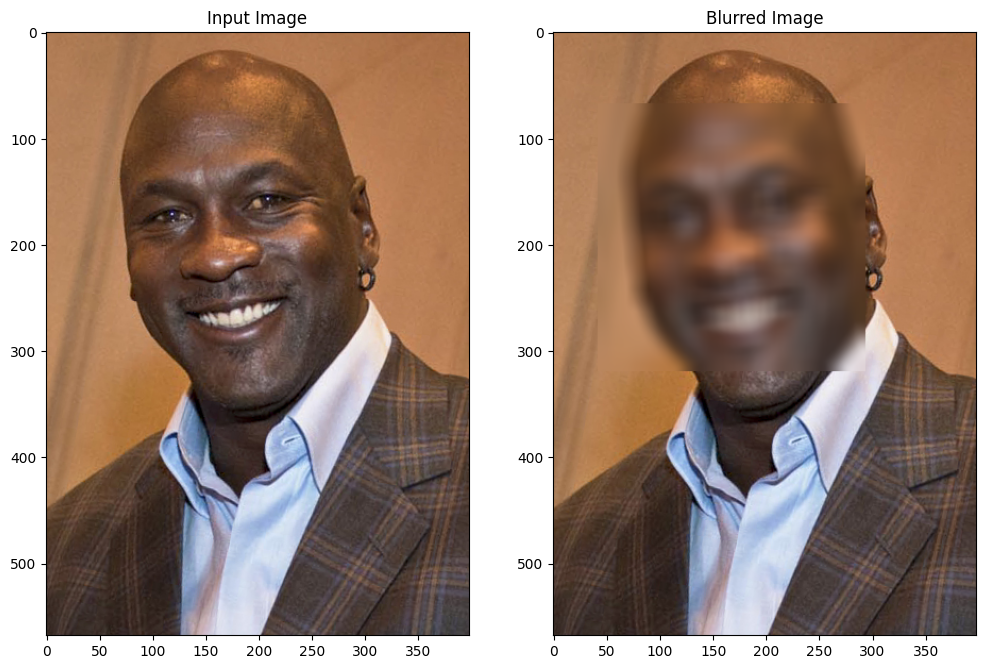

In [ ]:
haar_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

blurred = jordan_img.copy()
faces_rects = haar_cascade.detectMultiScale(jordan_img, scaleFactor = 1.6, minNeighbors = 5);
for (x,y,w,h) in faces_rects:
    roi = blurred[y:y+h, x:x+w]
    roi = cv2.GaussianBlur(roi, (21, 21), 30)
    blurred[y:y+h, x:x+w] = roi

plt.figure(figsize=(12, 8))
plt.subplot(121), plt.imshow(cv2.cvtColor(jordan_img,cv2.COLOR_BGR2RGB), cmap='gray'), plt.title('Input Image')
plt.subplot(122), plt.imshow(cv2.cvtColor(blurred,cv2.COLOR_BGR2RGB), cmap='gray'), plt.title('Blurred Image')

7. Lakukan segmentasi karakter pada KTP seperti gambar berikut

(<Axes: title={'center': 'Contour Detection'}>,
 Text(0.5, 1.0, 'Contour Detection'))

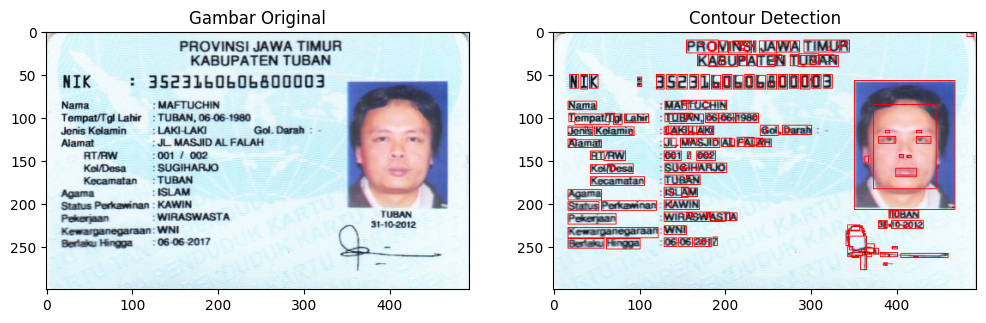

In [ ]:
ktp = cv2.imread('/content/drive/MyDrive/Images/KTP_More/ktp4.png')
ktp = cv2.cvtColor(ktp,cv2.COLOR_BGR2RGB)
gray = cv2.cvtColor(ktp, cv2.COLOR_RGB2GRAY)
blurred = cv2.GaussianBlur(gray, (3, 3), 1)
ret, thresh = cv2.threshold(blurred.copy(), 127, 255, cv2.THRESH_BINARY
+ cv2.THRESH_OTSU)

detected = ktp.copy()
edged = cv2.Canny(thresh, 16, 16)
contours, hierarchy = cv2.findContours(edged, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

for contour in contours:
    x, y, w, h = cv2.boundingRect(contour)
    cv2.rectangle(detected, (x, y), (x + w, y + h), (255, 0, 0), 1)

plt.figure(figsize=(12, 8))
plt.subplot(121), plt.imshow(ktp, cmap='gray'), plt.title('Gambar Original')
plt.subplot(122), plt.imshow(detected, cmap='gray'), plt.title('Contour Detection')

8. Lakukan cropping pada bagian NIK saja sehingga muncul hasil sebagai berikut

(<Axes: title={'center': 'Gambar Cropped'}>,
 Text(0.5, 1.0, 'Gambar Cropped'))

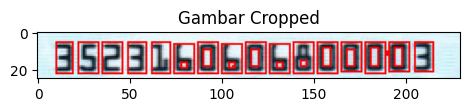

In [ ]:
ktp_crop = detected[45:70,110:340].copy()
plt.figure(figsize=(12, 8))
plt.subplot(122), plt.imshow(ktp_crop, cmap='gray'), plt.title('Gambar Cropped')

9. Kita akan menggunakan Deep Learning untuk melakukan pengenalan karakter
Sebelum melakukan training data, terlebih dahulu di siapkan data yang akan dilakukan
training yaitu data image nomor angka 0-9. Untuk membuat data tersebut bisa
gunakan image editor untuk dilakukan croping satu persatu. Kemudian selanjutnya
gunakan source code di bawah ini untuk proses persiapan untuk training.

In [ ]:
!sudo apt install tesseract-ocr
%pip install pytesseract

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following additional packages will be installed:
  tesseract-ocr-eng tesseract-ocr-osd
The following NEW packages will be installed:
  tesseract-ocr tesseract-ocr-eng tesseract-ocr-osd
0 upgraded, 3 newly installed, 0 to remove and 15 not upgraded.
Need to get 4,816 kB of archives.
After this operation, 15.6 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tesseract-ocr-eng all 1:4.00~git30-7274cfa-1.1 [1,591 kB]
Get:2 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tesseract-ocr-osd all 1:4.00~git30-7274cfa-1.1 [2,990 kB]
Get:3 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tesseract-ocr amd64 4.1.1-2.1build1 [236 kB]
Fetched 4,816 kB in 2s (2,858 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debc

Hasil deteksi pytesseract : 352316006800003



(<Axes: title={'center': 'Gambar Thresh'}>,
 Text(0.5, 1.0, 'Gambar Thresh'))

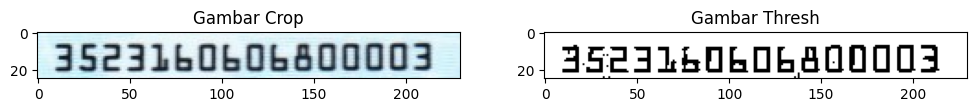

In [ ]:
import pytesseract
ktp_crop = ktp[45:70,110:340].copy()
gray = cv2.cvtColor(ktp_crop, cv2.COLOR_RGB2GRAY)
kernel = np.array([[-1,-1,-1],
                   [-1, 9,-1],
                   [-1,-1,-1]])
sharpen = cv2.filter2D(gray,-1,kernel)
opened = cv2.morphologyEx(sharpen, cv2.MORPH_OPEN, (3,3))
ret, thresh = cv2.threshold(opened.copy(), 127, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

custom_config = r'--psm 10 --oem 3 -c tessedit_char_whitelist=0123456789'
results = pytesseract.image_to_string(ktp_crop, config=custom_config)
print(f'Hasil deteksi pytesseract : {results}')

plt.figure(figsize=(12, 8))
plt.subplot(121), plt.imshow(ktp_crop, cmap='gray'), plt.title('Gambar Crop')
plt.subplot(122), plt.imshow(thresh, cmap='gray'), plt.title('Gambar Thresh')

In [ ]:
from keras import layers, models,optimizers,datasets,utils,losses
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
(x_train, y_train), (x_test, y_test) = datasets.mnist.load_data()
x_train = x_train.astype("float32") / 255.0
x_test = x_test.astype("float32") / 255.0
x_train = x_train.reshape(x_train.shape[0], 28, 28)
x_test = x_test.reshape(x_test.shape[0], 28, 28)

y_train_cat = utils.to_categorical(y_train,10)
y_test_cat = utils.to_categorical(y_test,10)


11490434/11490434 [==============================] - 0s 0us/step


In [ ]:
print(x_train.shape)
print(y_train.shape)

(60000, 28, 28)
(60000,)


In [ ]:

unique_labels = np.unique(y_test)
print(unique_labels)

[0 1 2 3 4 5 6 7 8 9]


In [ ]:
model = models.Sequential()
model.add(layers.Conv2D(32, (2, 2),activation='relu',input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (2, 2),activation='relu',padding='same'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (2, 2),activation='relu',padding='same'))
model.add(layers.MaxPooling2D((2, 2)))

In [ ]:
model.add(layers.Flatten())
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(len(unique_labels)))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 27, 27, 32)        160       
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 64)        8256      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 6, 6, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 6, 6, 128)         32896     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 3, 3, 128)         0

In [ ]:
model.compile(optimizer='Adam',
              loss=losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

10. Training data

In [ ]:
history = model.fit(x_train, y_train, epochs=3,
                    validation_data=(x_test, y_test))

Epoch 1/3
1875/1875 [==============================] - 39s 20ms/step - loss: 0.1490 - accuracy: 0.9525 - val_loss: 0.0491 - val_accuracy: 0.9839
Epoch 2/3
1875/1875 [==============================] - 36s 19ms/step - loss: 0.0476 - accuracy: 0.9847 - val_loss: 0.0407 - val_accuracy: 0.9871
Epoch 3/3
1875/1875 [==============================] - 36s 19ms/step - loss: 0.0351 - accuracy: 0.9885 - val_loss: 0.0374 - val_accuracy: 0.9870


In [ ]:
model.save('anpr.model')

12. Testing Data